In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read CSV
df = pd.read_csv("global_layoffs_cleansed.csv")

In [3]:
# Inspect dataset first 5 rows
df.head(5)

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised_millions,date
0,Gitpod,Kiel,Product,21,0.28,Series A,Germany,41,2023-01-24
1,Atlassian,Sydney,Other,500,0.05,Post-IPO,Australia,210,2023-03-06
2,Venngage,Toronto,Marketing,11,0.20,Unknown,Canada,0,2023-01-24
3,SiriusXM,New York City,Media,475,0.08,Post-IPO,United States,525,2023-03-06
4,Loft,Sao Paulo,Real Estate,340,0.15,Unknown,Brazil,788,2023-03-03


In [4]:
# Inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1191 non-null   object 
 1   location               1191 non-null   object 
 2   industry               1191 non-null   object 
 3   total_laid_off         1191 non-null   int64  
 4   percentage_laid_off    1191 non-null   float64
 5   stage                  1191 non-null   object 
 6   country                1191 non-null   object 
 7   funds_raised_millions  1191 non-null   int64  
 8   date                   1191 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 83.9+ KB


In [5]:
# Make a copy of original data set
df2 = df.copy()

In [6]:
df2.head()

,company,location,industry,total_laid_off,percentage_laid_off,stage,country,funds_raised_millions,date
0,Gitpod,Kiel,Product,21,0.28,Series A,Germany,41,2023-01-24
1,Atlassian,Sydney,Other,500,0.05,Post-IPO,Australia,210,2023-03-06
2,Venngage,Toronto,Marketing,11,0.20,Unknown,Canada,0,2023-01-24
3,SiriusXM,New York City,Media,475,0.08,Post-IPO,United States,525,2023-03-06
4,Loft,Sao Paulo,Real Estate,340,0.15,Unknown,Brazil,788,2023-03-03


In [7]:
# Ensure date column is datetime 
df2['date'] = pd.to_datetime(df2['date'])

# Data Presentation

### No. 1: Line Chart to see Total Layoff Over Time

In [8]:
# Group by month and sum layoffs
layoffs_over_time = df2.groupby(df2['date'].dt.to_period("M"))['total_laid_off'].sum().reset_index()

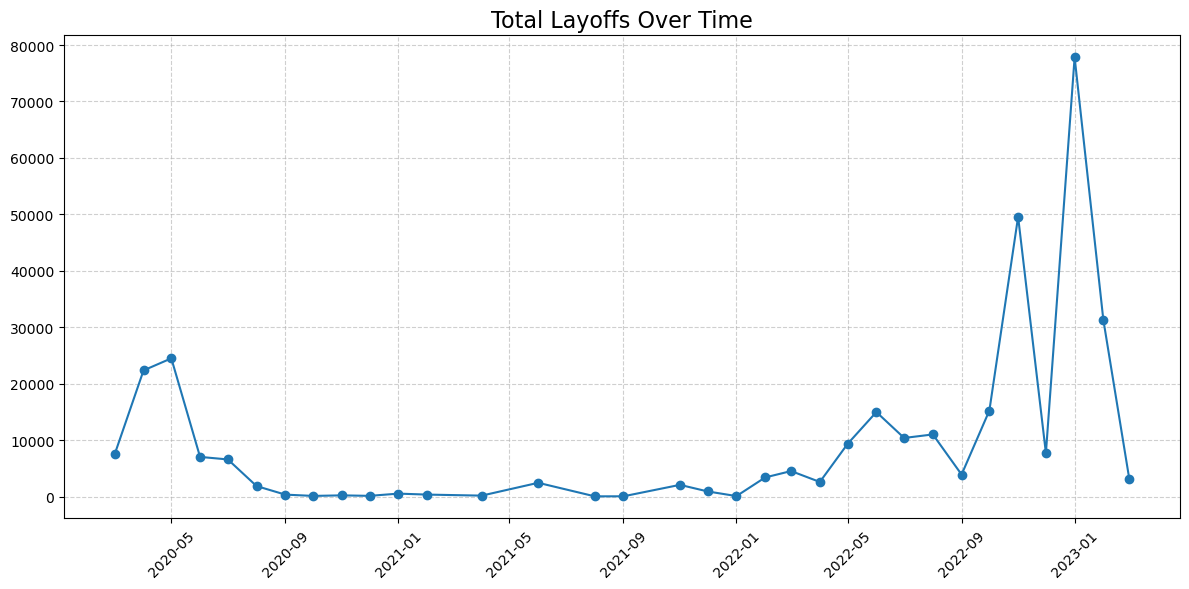

In [9]:
# Plot line chart
plt.figure(figsize=(12,6))

# Convert Period objects to datetime objects that matplotlib can handle
# Use .to_timestamp() to convert Period objects to datetime
plt.plot(layoffs_over_time['date'].dt.to_timestamp(), layoffs_over_time['total_laid_off'], marker='o', linestyle='-')

plt.title("Total Layoffs Over Time", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Observation: Layoffs spiked heavily year 2022 and 2023

### No. 2: Bar Chart to visualize Top Industries by Total Layoffs

In [10]:
# Create pivot table: industries vs countries
heatmap_data = (
    df2.pivot_table(
        index="industry",
        columns="country",
        values="total_laid_off",
        aggfunc="sum",
        fill_value=0
    )
)

In [11]:
# Keep top industries and countries (optional: to avoid clutter)
top_industries = df2.groupby("industry")["total_laid_off"].sum().sort_values(ascending=False).head(10).index
top_countries = df2.groupby("country")["total_laid_off"].sum().sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[heatmap_data.index.isin(top_industries), top_countries]

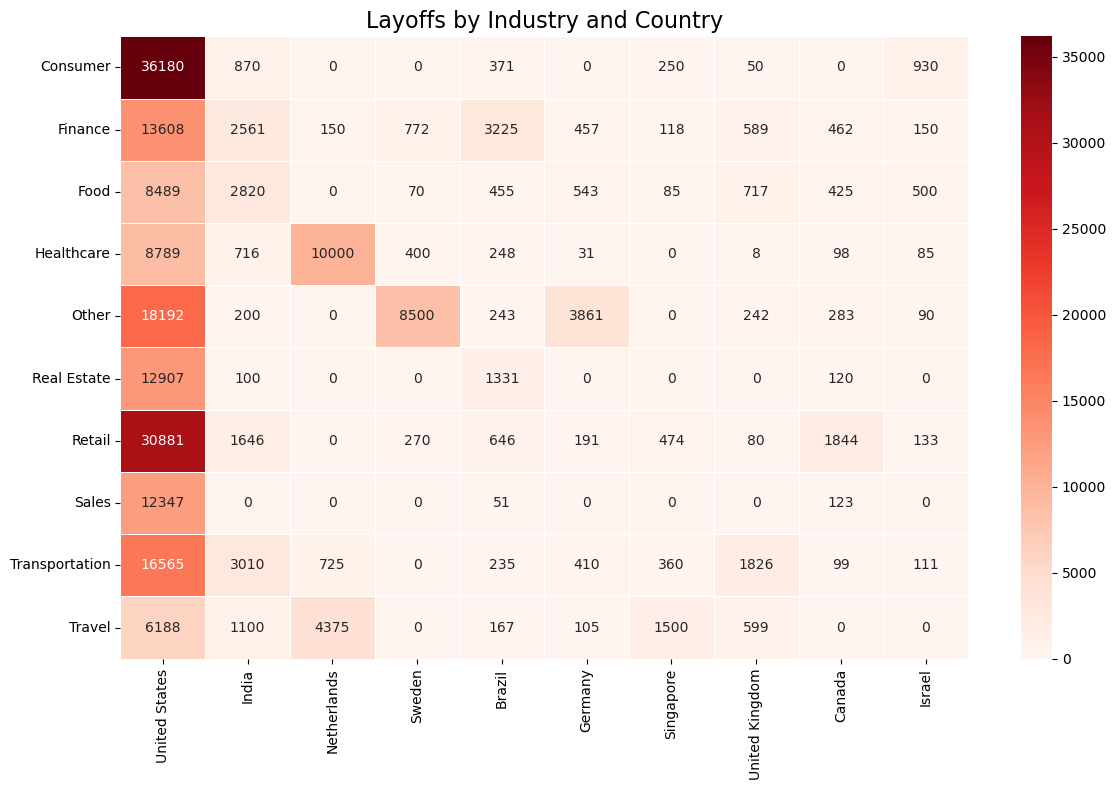

In [12]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title("Layoffs by Industry and Country", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

##### Observation: Comsumer and Retail Industry tops the Layoffs in the U.S 

### No. 3: Horizontal Bar Chart to visualize Layoffs by Country

In [13]:
# Group by country and sum layoffs
country_layoffs = df2.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

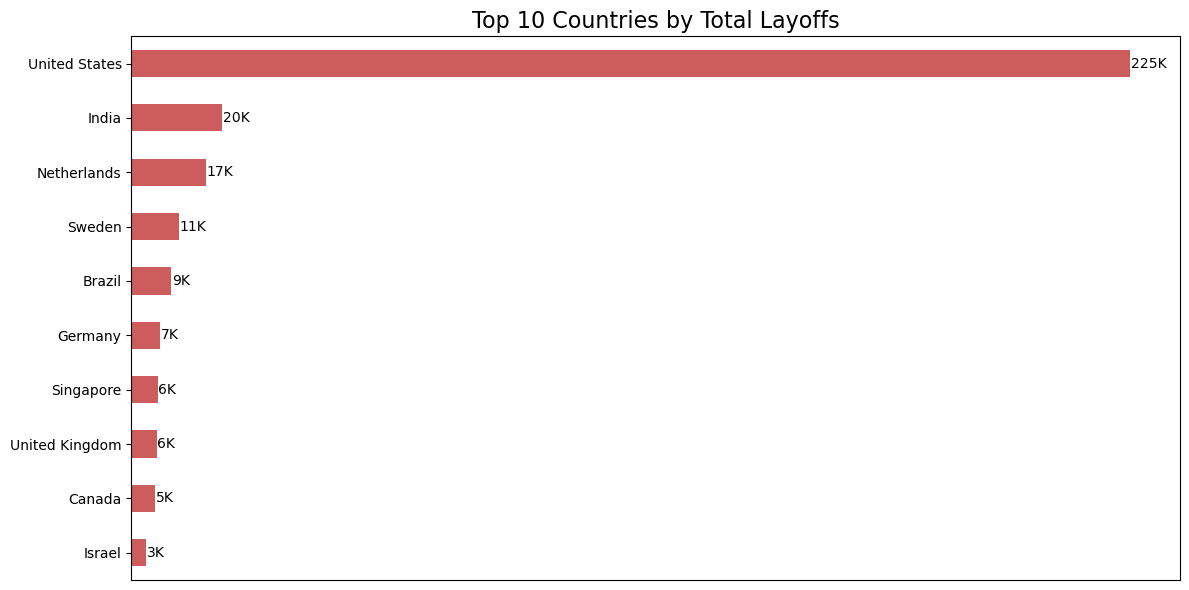

In [14]:
# Plot chart
plt.figure(figsize=(12,6))
bars = country_layoffs.plot(kind='barh', color='indianred')
plt.title("Top 10 Countries by Total Layoffs", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.gca().invert_yaxis()  

# Remove x-axis
plt.gca().xaxis.set_visible(False)

for index, value in enumerate(country_layoffs):
    label = f"{value/1000:.0f}K"  # round to nearest thousand
    plt.text(value + 100, index, label, va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation: United States tops the countries by Total layoffs

### No. 4: Bar Chart showing Top Industries by Total Layoffs

In [15]:
# Group by industry and sum layoffs
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

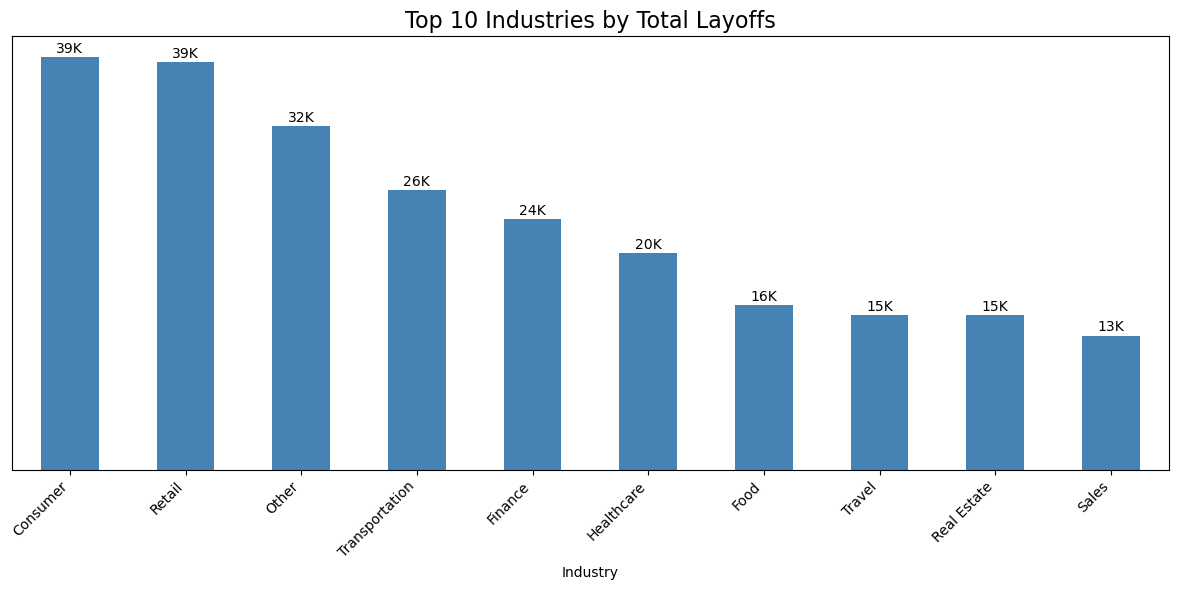

In [16]:
# Plot
plt.figure(figsize=(12,6))
bars = industry_layoffs.plot(kind='bar', color='steelblue')
plt.title("Top 10 Industries by Total Layoffs", fontsize=16)
plt.xlabel("Industry")
plt.xticks(rotation=45, ha='right')

# Remove y-axis
plt.gca().yaxis.set_visible(False)

# Add value labels in K format just above the bars
for index, value in enumerate(industry_layoffs):
    label = f"{value/1000:.0f}K"
    plt.text(index, value + 100, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation: Consumer and Retail industry tops the list of Total Layoffs

### No. 5: Bar Chart showing Top 10 Companies by Layoffs

In [17]:
# Group by company and sum layoffs
company_layoffs = (
    df.groupby('company')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

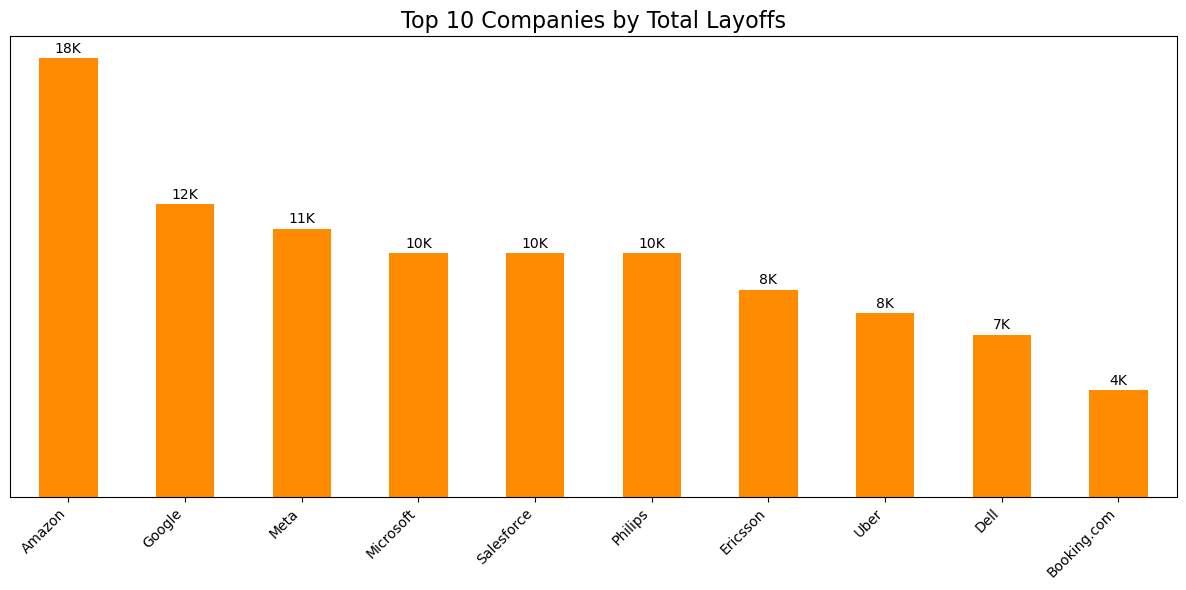

In [18]:
# Plot
plt.figure(figsize=(12,6))
bars = company_layoffs.plot(kind='bar', color='darkorange')
plt.title("Top 10 Companies by Total Layoffs", fontsize=16)
plt.xlabel("")
plt.xticks(rotation=45, ha='right')

# Remove y-axis for cleaner look
plt.gca().yaxis.set_visible(False)

# Add value labels in K format
for index, value in enumerate(company_layoffs):
    label = f"{value/1000:.0f}K"
    plt.text(index, value + 100, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation: Amazon, Google and Meta leads companies by Layoffs

### No. 6: Bar Chart to show Total Layoffs by Company Stage

In [19]:
# Exclude "Unknown" stage 
exclude_unknown = df2[df2['stage'].str.lower() != "unknown"]

In [20]:
# Group by stage and sum layoffs
stage_layoffs = exclude_unknown.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False)

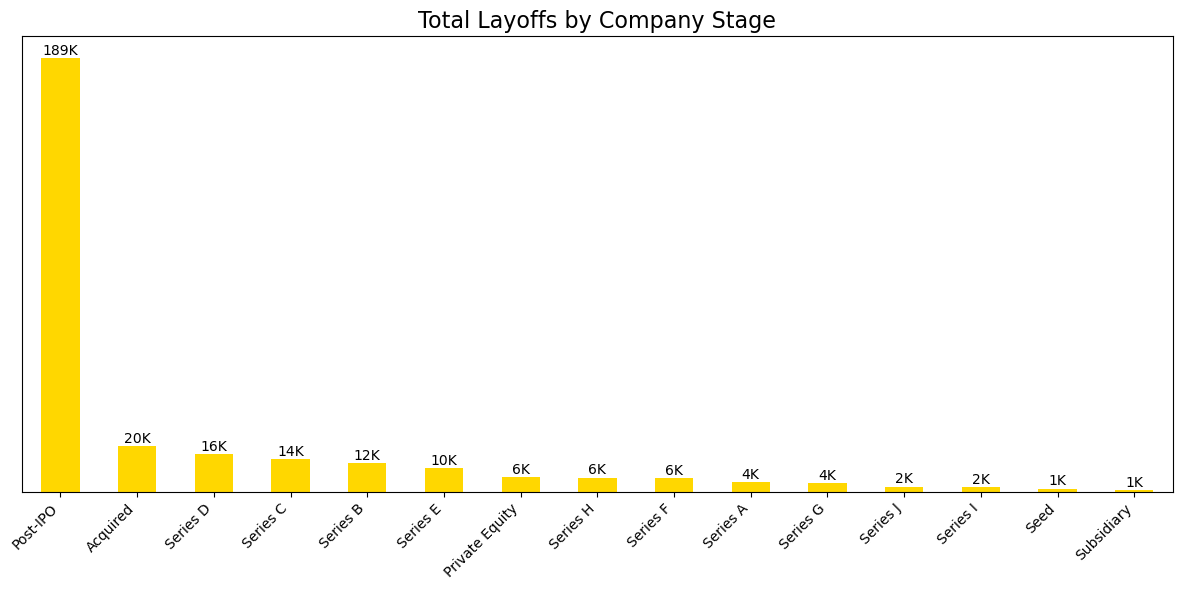

In [21]:
# Plot
plt.figure(figsize=(12,6))
bars = stage_layoffs.plot(kind='bar', color='gold')
plt.title("Total Layoffs by Company Stage", fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha='right')

# Remove y-axis
plt.gca().yaxis.set_visible(False)

# Add value labels in K format
for index, value in enumerate(stage_layoffs):
    label = f"{value/1000:.0f}K"
    plt.text(index, value + 100, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### Observation: Companies in their Post-IPO stages have high layoffs rate

### No. 7: Scatter plot to show if Funding is corrected to % Layoffs

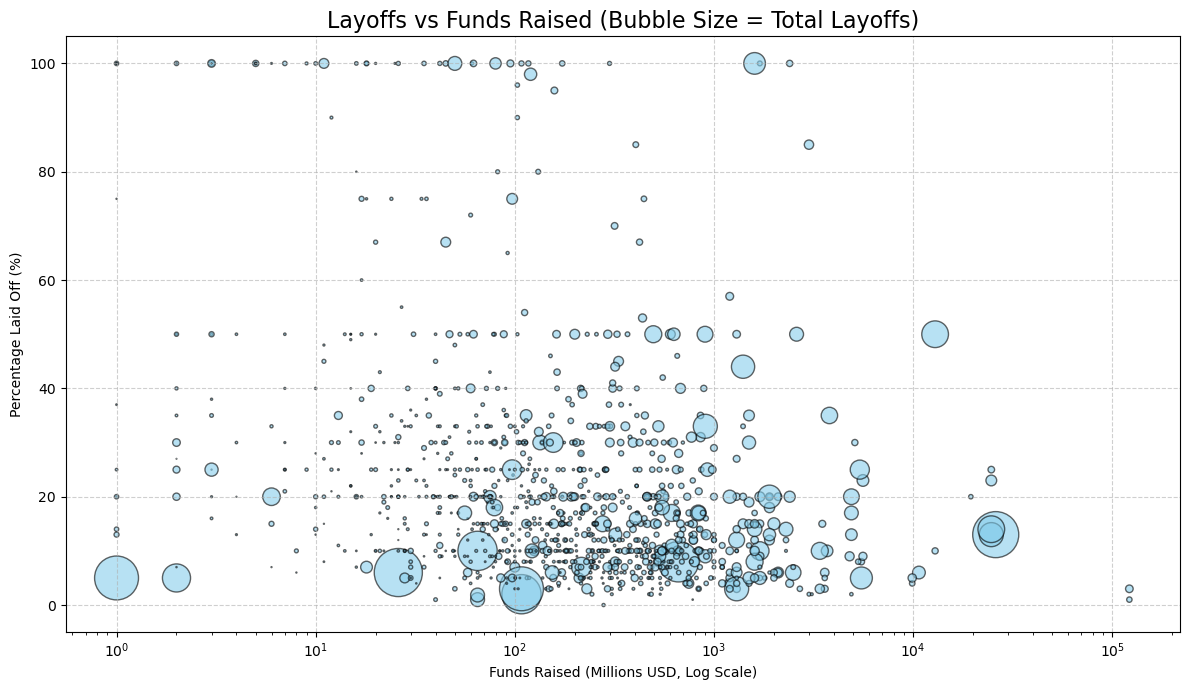

In [22]:
# Scatter plot (bubble chart): Funds Raised vs % Laid Off
plt.figure(figsize=(12,7))
scatter = plt.scatter(
    df2['funds_raised_millions'],
    df['percentage_laid_off'] * 100,  # convert to %
    s=df2['total_laid_off'] / 10,      # bubble size scaled down
    alpha=0.6,
    color='skyblue',
    edgecolor='k'
)

plt.xscale('log')  # log scale for funds raised
plt.title("Layoffs vs Funds Raised (Bubble Size = Total Layoffs)", fontsize=16)
plt.xlabel("Funds Raised (Millions USD, Log Scale)")
plt.ylabel("Percentage Laid Off (%)")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##### Observation: Companies across all funding levels show layoff percentages ranging from very small (<5%) to very high (close to 100%).

### No. 8: Histogram shwong Layoff Severity Distribution

In [23]:
# Convert percentage to %
percent_values = df['percentage_laid_off'] * 100

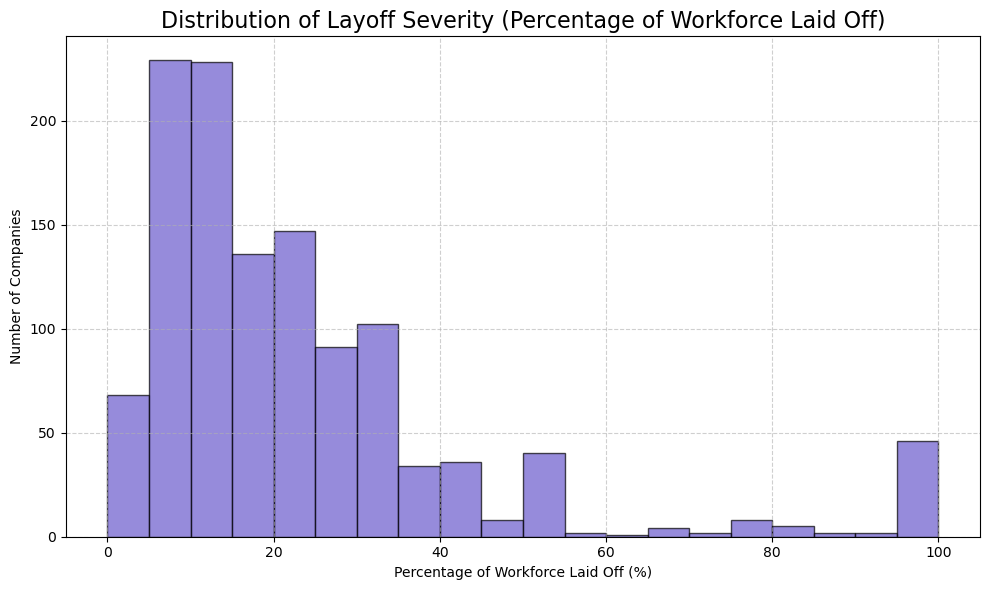

In [24]:
# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(percent_values, bins=20, color='slateblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Layoff Severity (Percentage of Workforce Laid Off)", fontsize=16)
plt.xlabel("Percentage of Workforce Laid Off (%)")
plt.ylabel("Number of Companies")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##### Observation: A large number of companies has laid off 5 to 25% of their workforce